In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [69]:
signal_frequency = 1 # in hertz
omega = 2* np.pi *signal_frequency
# omega = signal_frequency
R = 1

sampling_frequency = 10#int((2/signal_frequency)+1) # Sampling freq. ≥ 2*signal freq
samples = 3# Number of samples

sampling_frequency, signal_frequency, 1/signal_frequency

(10, 1, 1.0)

In [70]:
def wave_function(arr):
    # return R*np.cos(omega*arr)+1
    # return R*np.sin(omega*arr)
    # print(omega)
    return R*np.cos(omega*arr) #+ np.cos(0.5*omega*arr) + 2*R*np.cos(0.3*omega*arr)


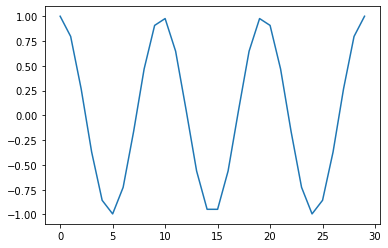

In [71]:
arr = np.linspace(start=0 ,stop=samples ,num = sampling_frequency*samples)
data = wave_function(arr)
plt.plot(data)
plt.xticks = arr
plt.show()

In [72]:
np.savetxt("babes/wave.csv", data, delimiter=",")

## FFT

In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices

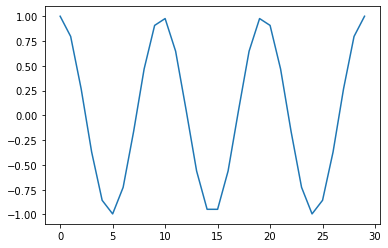

In [74]:
wave = np.genfromtxt('babes/wave.csv', delimiter=',')
estimated_sampling_frequency = sampling_frequency
plt.plot(wave)

n = wave.shape[0]
# n = 4
scaling_factor = (n/estimated_sampling_frequency) # estimated samples

In [75]:
sp = np.fft.fft(wave, n, norm = 'ortho')
freq = np.fft.fftfreq(n, d = 1/estimated_sampling_frequency)

In [76]:
frequencies = pd.DataFrame(freq, columns=['Frequency'])
frequencies['Amplitude'] = np.abs(sp)/scaling_factor
frequencies['Phase'] = np.angle(sp)
frequencies['Real'] = np.real(sp)
frequencies['Imaginary'] = np.imag(sp)
frequencies['wave'] = sp
frequencies = frequencies[frequencies.Amplitude > 0.1*frequencies.Amplitude.max()] # Greater than 10% of the max amplitude
frequencies.set_index('Frequency', inplace=True)
frequencies.head()

,Amplitude,Phase,Real,Imaginary,wave
Frequency,,,,,
0.666667,0.103346,0.209440,0.303262,0.064460,0.303262+0.064460j
1.000000,0.913192,0.314159,2.605490,0.846575,2.605490+0.846575j
-1.000000,0.913192,-0.314159,2.605490,-0.846575,2.605490-0.846575j
-0.666667,0.103346,-0.209440,0.303262,-0.064460,0.303262-0.064460j


### Wave Reconstruction

In [77]:
def reconstruct_wave(magnitudes, time):
    omega = np.reshape(2*np.pi*magnitudes.index,(magnitudes.shape[0],1))
    time = np.reshape(time,(1, time.shape[0]))
    return (np.cos((omega @ time)).T @ magnitudes)/2#*np.pi#*(n**0.1)) 
    # Scaling factor needed to make the wave have the same amplitude as the original wave

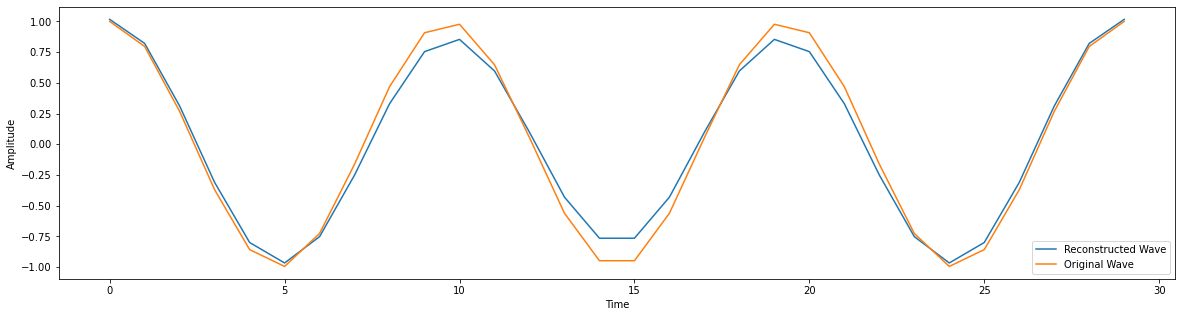

In [78]:
reconstructed_wave = reconstruct_wave(frequencies.Amplitude, arr)

plt.figure(figsize= (20,5))
plt.plot(reconstructed_wave, label='Reconstructed Wave')
plt.plot(wave, label='Original Wave')
# plt.plot(np.fft.ifft(frequencies['wave'], n, norm = 'ortho'), label='IFFT Wave') # Inacurate in reduced dimensions
plt.legend(loc = 4)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

## Seasonality Dataset

In [81]:
df = []
for slope in range(5):
    df.extend(wave_function(arr) + (slope%2)*arr)
df = pd.Series(df)

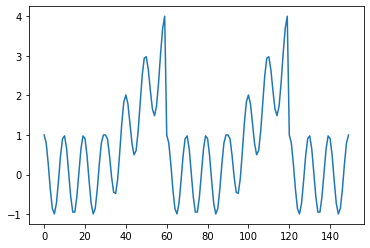

In [83]:
df.plot()
df.to_csv('babes/wave_with_slope.csv', index=False)